In [1]:
import pandas as pd

df = pd.read_csv(
    "exoplanets_dataset.csv",
    comment="#"
)

df.head()


C:\Users\saike\AppData\Local\Temp\ipykernel_14324\2810177355.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,2,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,2,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,2,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,1,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [2]:
df.shape

(39212, 288)

In [20]:
df.columns

Index(['pl_name', 'pl_rade', 'pl_bmasse', 'pl_dens', 'pl_eqt', 'pl_orbper',
       'st_teff', 'st_lum', 'st_met', 'st_spectype_A1 IV-V',
       ...
       'st_spectype_M5.0+0.5-0.5', 'st_spectype_M5.5+/-0.5', 'st_spectype_M5V',
       'st_spectype_M6 V', 'st_spectype_M6.5+/-0.5', 'st_spectype_M8.0 V',
       'st_spectype_M9-L1', 'st_spectype_m3 V', 'habitability_score',
       'stellar_compatibility'],
      dtype='object', length=176)

In [ ]:
# NASA provides 288+ columns, many irrelevant
# ML models work better with focused, meaningful features
# These columns directly affect habitability

required_columns = [
    "pl_name",        # Planet name
    "pl_rade",        # Planet radius
    "pl_bmasse",      # Planet mass
    "pl_dens",        # Planet density
    "pl_eqt",         # Equilibrium temperature
    "pl_orbper",      # Orbital period
    "st_teff",        # Star temperature
    "st_lum",         # Star luminosity
    "st_spectype",    # Star type
    "st_met"          # Star metallicity
]

df = df[required_columns]
df.head()

 


,pl_name,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,st_teff,st_lum,st_spectype,st_met
0,11 Com b,NaN,4914.898486,NaN,NaN,323.21000,4874.0,1.97823,G8 III,-0.26
1,11 Com b,NaN,6165.600000,NaN,NaN,326.03000,4742.0,2.24300,G8 III,-0.35
2,11 Com b,NaN,5434.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11 UMi b,NaN,3337.070000,NaN,NaN,516.22000,4340.0,NaN,K4 III,0.04
4,11 UMi b,NaN,4684.814200,NaN,NaN,516.21997,4213.0,NaN,NaN,-0.02


In [ ]:
# Checking Data Completeness
# Real-world scientific data is incomplete
# We must identify missing values before ML
# This step informs cleaning strategy

df.isnull().sum()


pl_name            0
pl_rade        12197
pl_bmasse      32137
pl_dens        36499
pl_eqt         22030
pl_orbper       3341
st_teff         3521
st_lum         29570
st_spectype    36322
st_met         14447
dtype: int64

tTill now we finished these:
Collect exoplanet datasets from sources like NASA Exoplanet Archive and Kaggle.
• Dataset features may include:
• Planet radius, mass, density, surface temperature, orbital period, distance from star
• Host star type, luminosity, temperature, metallicity
• Store data in PostgreSQL or CSV format.
• Validate schema and ensure completeness.

Week 1 done

WEEK 2: DATA CLEANING AND FEATURE ENGINEERING


Apply Cleaning Strategy

Drop rows missing critical habitability features

Median imputation for optional numerical features

Handle categorical separately

Why this was done

Without radius, temperature, orbit → habitability cannot be assessed

Median is robust against extreme astronomical values

Outcome:
✔ Clean dataset
✔ Scientifically valid imputation

In [6]:
# Drop rows missing CRITICAL features
df = df.dropna(subset=["pl_rade", "pl_eqt", "pl_orbper", "st_teff"])

In [7]:
df.shape

(16785, 10)

In [8]:
# filling optional missing values
df["pl_bmasse"].fillna(df["pl_bmasse"].median(), inplace=True)
df["pl_dens"].fillna(df["pl_dens"].median(), inplace=True)
df["st_lum"].fillna(df["st_lum"].median(), inplace=True)
df["st_met"].fillna(df["st_met"].median(), inplace=True)


C:\Users\saike\AppData\Local\Temp\ipykernel_14324\2066152841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pl_bmasse"].fillna(df["pl_bmasse"].median(), inplace=True)
C:\Users\saike\AppData\Local\Temp\ipykernel_14324\2066152841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [9]:
df.isnull().sum()


pl_name            0
pl_rade            0
pl_bmasse          0
pl_dens            0
pl_eqt             0
pl_orbper          0
st_teff            0
st_lum             0
st_spectype    15875
st_met             0
dtype: int64

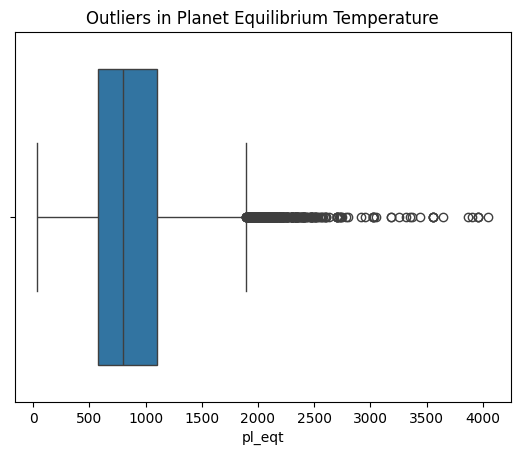

In [ ]:
# Handle Outliers (Visual Analysis)
# Why this was done
# Astronomical data is naturally skewed
# Hot Jupiters appear as statistical outliers
# Removing them would remove real planets

# Outcome: 

# ✔ Outliers identified
# ✔ Retained for scientific validity

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["pl_eqt"])
plt.title("Outliers in Planet Equilibrium Temperature")
plt.show()

In [ ]:
# ML models cannot process text like G8 III
# One-hot encoding converts categories → numerical columns
# drop_first=True avoids multicollinearity

# Outcome

# ✔ Categorical data converted to ML-ready format

df = df.dropna(subset=["st_spectype"])
df = pd.get_dummies(df, columns=["st_spectype"], drop_first=True)


### Habitability Score Index (HSI)

The Habitability Score Index is a rule-based feature engineered to estimate an exoplanet’s potential to support life.  
It is calculated using three key astrophysical conditions related to liquid water and stellar stability.

Each satisfied condition contributes **+1 point**, giving a total score between **0 and 3**.

**Scoring Criteria:**
- **Planet Radius (0.8 – 1.5 Earth radii):** Ensures Earth-like size capable of retaining an atmosphere.
- **Equilibrium Temperature (200 – 320 K):** Represents the temperature range suitable for liquid water.
- **Host Star Temperature (2500 – 6000 K):** Indicates a stable, long-lived star environment.

A higher score indicates a higher likelihood of habitability.


In [ ]:
# Feature Engineering
# Habitability Score Index
# Converts astrophysics rules into a numerical feature
def habitability_score(row):
    score = 0
    if 0.8 <= row["pl_rade"] <= 1.5:
        score += 1
    if 200 <= row["pl_eqt"] <= 320:
        score += 1
    if 2500 <= row["st_teff"] <= 6000:
        score += 1
    return score

df["habitability_score"] = df.apply(habitability_score, axis=1)


### Stellar Compatibility Index (SCI)

The Stellar Compatibility Index measures how suitable a host star is for supporting habitable planets.  
Since stellar properties strongly influence planetary climate and stability, this index focuses on star-related conditions.

Each satisfied condition contributes **+1 point**, giving a total score between **0 and 2**.

**Scoring Criteria:**
- **Star Effective Temperature (2500 – 6000 K):** Represents stable, long-lived stars that provide consistent energy output.
- **Star Metallicity (−0.5 to 0.5):** Indicates sufficient heavy elements for planet formation, similar to the Sun.

A higher score indicates a more favorable stellar environment for habitability.


In [13]:
# Stellar Compatibility Index
def stellar_compatibility(row):
    score = 0
    if 2500 <= row["st_teff"] <= 6000:
        score += 1
    if -0.5 <= row["st_met"] <= 0.5:
        score += 1
    return score

df["stellar_compatibility"] = df.apply(stellar_compatibility, axis=1)


In [14]:
# Normalize Numerical Features
from sklearn.preprocessing import StandardScaler

num_cols = [
    "pl_rade", "pl_bmasse", "pl_dens",
    "pl_eqt", "pl_orbper", "st_teff",
    "st_lum", "st_met"
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [15]:
# Validate Data Quality (Statistics + Visualization)
df.describe()


,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,st_teff,st_lum,st_met,habitability_score,stellar_compatibility
count,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,910.000000,910.000000
mean,1.561632e-16,-7.905764e-17,3.513673e-17,2.342449e-17,-1.561632e-17,-7.183509e-16,7.808162e-17,4.684897e-17,0.995604,1.821978
std,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,0.598846,0.382742
min,-1.077806e+00,-4.449580e-01,-1.667009e-01,-1.556443e+00,-3.383011e-02,-2.369909e+00,-3.984342e+00,-3.409450e+00,0.000000,1.000000
25%,-8.303360e-01,-4.248028e-01,-1.170173e-01,-7.866512e-01,-3.382991e-02,-9.496312e-01,-1.436057e-01,-6.063401e-01,1.000000,2.000000
50%,-6.115059e-01,-2.876926e-01,-9.368647e-02,-2.987938e-01,-3.382976e-02,1.860469e-01,3.402987e-01,1.793323e-02,1.000000,2.000000
75%,9.249025e-01,-6.778267e-02,-4.318616e-02,6.906250e-01,-3.382931e-02,7.638560e-01,3.402987e-01,7.034099e-01,1.000000,2.000000
max,2.808766e+00,1.009763e+01,2.160919e+01,5.615793e+00,3.014360e+01,4.745074e+00,2.988133e+00,2.563989e+00,3.000000,2.000000


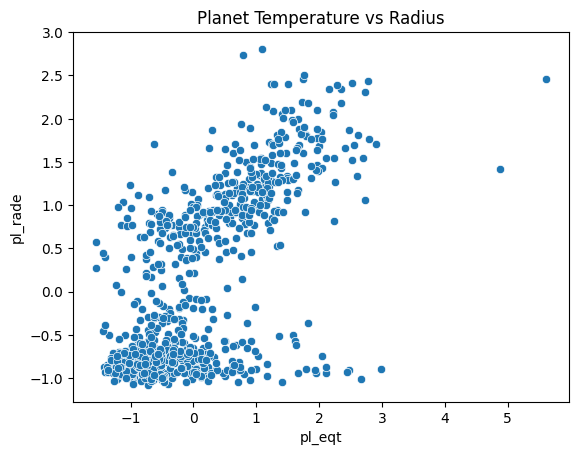

In [ ]:
# Visualization
# Planet Temperature vs Radius

import seaborn as sns
sns.scatterplot(
    x="pl_eqt",
    y="pl_rade",
    data=df
)
plt.title("Planet Temperature vs Radius")
plt.show()


In [18]:
# Save Cleaned Dataset
df.to_csv("exoplanets_processed.csv", index=False)
df.head()


,pl_name,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,st_teff,st_lum,st_met,st_spectype_A1 IV-V,...,st_spectype_M5.0+0.5-0.5,st_spectype_M5.5+/-0.5,st_spectype_M5V,st_spectype_M6 V,st_spectype_M6.5+/-0.5,st_spectype_M8.0 V,st_spectype_M9-L1,st_spectype_m3 V,habitability_score,stellar_compatibility
207,BD+20 594 b,-0.787976,-0.418696,0.259680,-0.786651,-0.033827,0.753433,0.497019,-0.716506,False,...,False,False,False,False,False,False,False,False,1,2
255,CFHTWIR-Oph 98 b,2.405074,3.645964,-0.093686,1.504634,0.569718,-2.369909,-3.414303,-0.275842,False,...,False,False,False,False,False,False,True,False,0,1
259,COCONUTS-2 b,0.963345,2.859125,-0.093686,-0.991296,30.143598,-1.385594,-1.849483,0.017933,False,...,False,False,False,False,False,False,False,False,1,2
261,CoRoT-1 b,1.693584,0.094676,-0.149223,1.683698,-0.033830,0.920204,0.340299,-1.450945,False,...,False,False,False,False,False,False,False,False,1,2
271,CoRoT-10 b,0.693757,0.996893,0.031543,-0.687983,-0.033829,0.127133,0.340299,1.290961,False,...,False,False,False,False,False,False,False,False,1,2


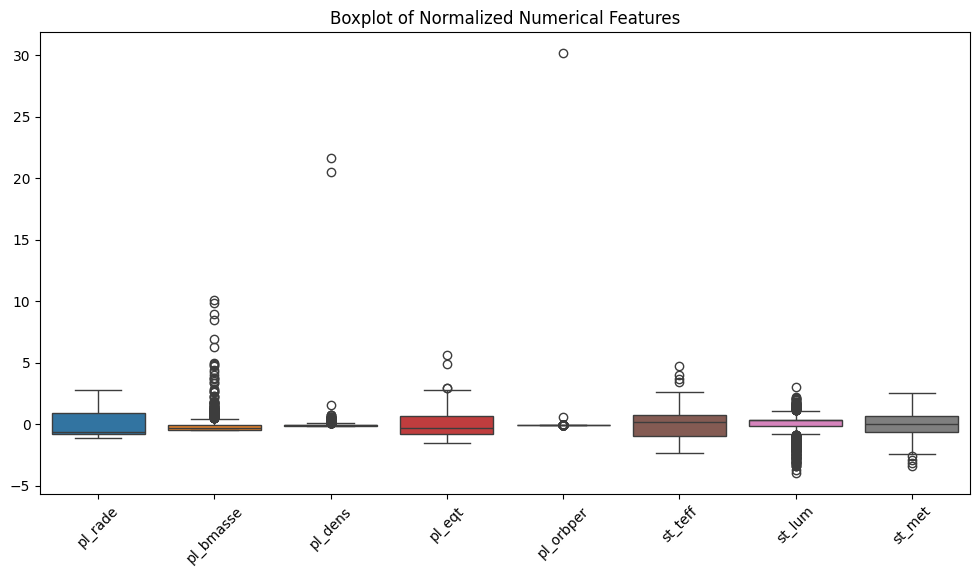

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Normalized Numerical Features")
plt.show()


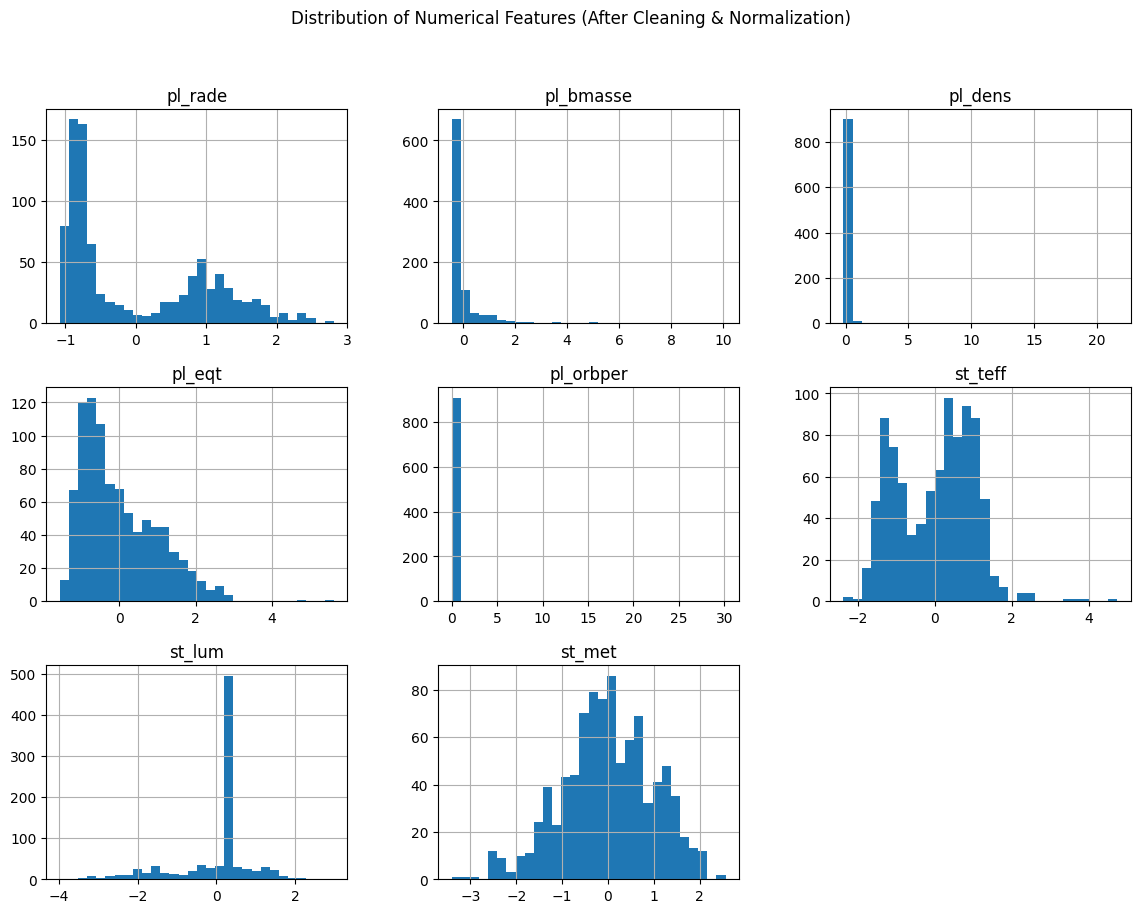

In [23]:
df[num_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribution of Numerical Features (After Cleaning & Normalization)")
plt.show()
